## Data cleaning

In [1]:
# import our needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
import sys

In [2]:
# read our dataset into a dataframe
df=pd.read_csv('Fortune_1000.csv')
df.head()

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

In [4]:
df['Market Cap']=pd.to_numeric(df['Market Cap'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

In [5]:
# deal with missing values
# check if there are null values in our dataframe
df.isnull().sum()

company               0
rank                  0
rank_change           0
revenue               0
profit                3
num. of employees     1
sector                0
city                  0
state                 0
newcomer              0
ceo_founder           0
ceo_woman             0
profitable            0
prev_rank             0
CEO                   0
Website               0
Ticker               49
Market Cap           39
dtype: int64

In [6]:
# first we drop the row that has 4 or more null values
df.dropna(thresh=4)
# check again
df.isnull().sum()

company               0
rank                  0
rank_change           0
revenue               0
profit                3
num. of employees     1
sector                0
city                  0
state                 0
newcomer              0
ceo_founder           0
ceo_woman             0
profitable            0
prev_rank             0
CEO                   0
Website               0
Ticker               49
Market Cap           39
dtype: int64

In [7]:
# now we will replace all null values 
# this for loop to replace every null value in my dataframe
for label in df.columns:
    if df[label].dtypes =='object': # replace the object datatypes
        df[label].fillna(value='unknown',inplace=True)
        
    else: #replace the numeric datatypes
        df[label].fillna(value=df[label].mean(),inplace=True)
# now check for null values        
df.isnull().sum()

company              0
rank                 0
rank_change          0
revenue              0
profit               0
num. of employees    0
sector               0
city                 0
state                0
newcomer             0
ceo_founder          0
ceo_woman            0
profitable           0
prev_rank            0
CEO                  0
Website              0
Ticker               0
Market Cap           0
dtype: int64

In [8]:
# we will delete some extra variables that we will not use in our project
df.drop(['city','ceo_founder','CEO','Website','Ticker','prev_rank','rank_change','ceo_founder'],axis=1,inplace=True)
df.head()

,company,rank,revenue,profit,num. of employees,sector,state,newcomer,ceo_woman,profitable,Market Cap
0,Walmart,1,572754.0,13673.0,2300000.0,Retailing,AR,no,no,yes,352037.0
1,Amazon,2,469822.0,33364.0,1608000.0,Retailing,WA,no,no,yes,1202717.0
2,Apple,3,365817.0,94680.0,154000.0,Technology,CA,no,no,yes,2443962.0
3,CVS Health,4,292111.0,7910.0,258000.0,Health Care,RI,no,yes,yes,125204.0
4,UnitedHealth Group,5,287597.0,17285.0,350000.0,Health Care,MN,no,no,yes,500468.0


In [9]:
df = df.drop_duplicates()

In [10]:
#check if there is a duplication in the dataframe
df.duplicated().sum()

0

In [11]:
# here we will get our prediction column from any computation we will do later
df_target=df['profit']
df.drop('profit',axis=1,inplace=True)

Text(0.5, 1.0, 'boxplot to see the ouliers of numeric data')

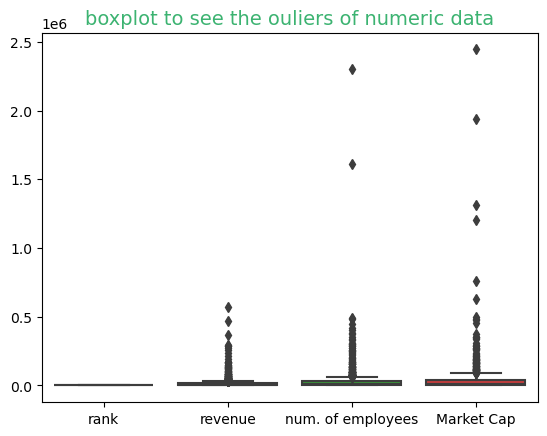

In [12]:
#detect and remove outliers
# we first need to divide our dataset into tow dataframes depending on datatypes of there data
#[numeric and object]
df_numerics=df.select_dtypes(exclude='object')
df_objects=df.select_dtypes(include='object')
# use boxplot to view if there are outliers
sns.boxplot(df_numerics)
plt.title('boxplot to see the ouliers of numeric data', fontsize=14, color='MediumSeaGreen')

C:\Users\Kiro\AppData\Local\Temp\ipykernel_5108\660203779.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1366.9512012142372' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_numerics.loc[df_numerics[label]>upper_limit,label]=upper_limit


Text(0.5, 1.0, 'boxplot to check the removl of ouliers')

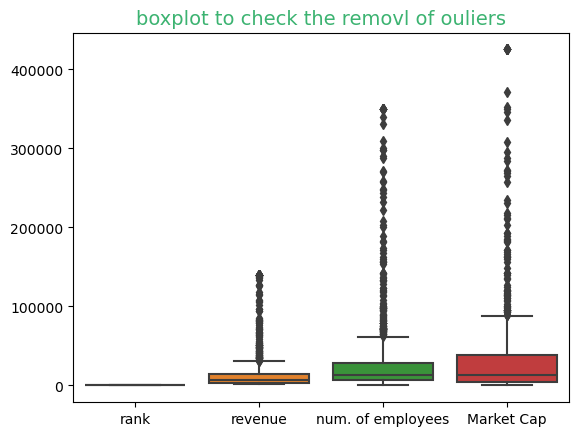

In [13]:
# use z_scores method to remove outliers
# as the number of employees is important in by prediction
# we will use capping method to remove outliers by change there values and not loss any important 
#data
# for loop to go throw our columns that has numeric datatypes
for label in df_numerics:
    # get the upper limit of our distribution
    upper_limit=df_numerics[label].mean()+3*df_numerics[label].std()
   # get the lower limit of our distribution
    lower_limit=df_numerics[label].mean()-3*df_numerics[label].std()
   # now we will change the outliers to be fit in our distribution
    df_numerics.loc[df_numerics[label]>upper_limit,label]=upper_limit
    df_numerics.loc[df_numerics[label]<lower_limit,label]=lower_limit
# new lets test the outliers
sns.boxplot(df_numerics)
plt.title('boxplot to check the removl of ouliers', fontsize=14, color='MediumSeaGreen')

In [14]:
# first before we do scaling and normalization we must convert categorical types to be numerics
#use LabelEncoder function to convert to numeric
lab=LabelEncoder()
limit=df_objects.shape[1] # how many columns there are our df_objects
for i in range(0,limit):
    df_objects.iloc[:,i]=lab.fit_transform(df_objects.iloc[:,i]) # convert to numeric datatype
# then concate our two subdatasets into one again that will be raw without scaling and normalization
df_raw=pd.concat([df_numerics,df_objects],axis=1)
df_raw.head()

,rank,revenue,num. of employees,Market Cap,company,sector,state,newcomer,ceo_woman,profitable
0,1.0,140426.646061,349595.437127,352037.000000,949,16,1,0,0,1
1,2.0,140426.646061,349595.437127,425253.478889,54,16,44,0,0,1
2,3.0,140426.646061,154000.000000,425253.478889,85,17,3,0,0,1
3,4.0,140426.646061,258000.000000,125204.000000,177,9,37,0,1,1
4,5.0,140426.646061,349595.437127,425253.478889,913,9,22,0,0,1


In [15]:
#scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw)
df_scaled = pd.DataFrame(df_scaled, columns=df_raw.columns) # this data frame is scaled now
df_scaled

,rank,revenue,num. of employees,Market Cap,company,sector,state,newcomer,ceo_woman,profitable
0,-1.730317,4.745700,5.694371,5.068942,1.557114,1.071350,-1.509556,-0.175863,-0.300853,0.364009
1,-1.726853,4.745700,5.694371,6.236181,-1.543258,1.071350,1.547520,-0.175863,-0.300853,0.364009
2,-1.723389,4.745700,2.187128,6.236181,-1.435871,1.248433,-1.367366,-0.175863,-0.300853,0.364009
3,-1.719925,4.745700,4.051963,1.452702,-1.117173,-0.168229,1.049857,-0.175863,3.323882,0.364009
4,-1.716461,4.745700,5.694371,6.236181,1.432407,-0.168229,-0.016565,-0.175863,-0.300853,0.364009
...,...,...,...,...,...,...,...,...,...,...
995,1.716482,-0.525957,-0.559918,-0.516155,1.522473,0.363020,-1.367366,-0.175863,-0.300853,-2.747182
996,1.719946,-0.526026,-0.488194,-0.530106,-1.730320,1.071350,0.623288,-0.175863,-0.300853,0.364009
997,1.723410,-0.526384,-0.546757,-0.526152,-0.819260,-0.699477,0.623288,-0.175863,-0.300853,0.364009
998,1.726874,-0.526453,-0.500746,-0.454031,-1.387373,-1.230725,-1.082987,-0.175863,-0.300853,0.364009


In [16]:
df_scaled.describe().round(2)

,rank,revenue,num. of employees,Market Cap,company,sector,state,newcomer,ceo_woman,profitable
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.73,-0.53,-0.57,-0.54,-1.73,-1.76,-1.58,-0.18,-0.30,-2.75
25%,-0.87,-0.47,-0.46,-0.47,-0.87,-0.70,-1.01,-0.18,-0.30,0.36
50%,0.00,-0.36,-0.33,-0.34,0.00,-0.17,0.05,-0.18,-0.30,0.36
75%,0.87,-0.05,-0.05,0.07,0.87,1.07,0.91,-0.18,-0.30,0.36
max,1.73,4.75,5.69,6.24,1.73,1.78,1.62,5.69,3.32,0.36


In [17]:
# then normalization
normalize = MinMaxScaler()
df_scaled_and_normalized = normalize.fit_transform(df_scaled)
df_scaled_and_normalized = pd.DataFrame(df_scaled_and_normalized, columns=df_scaled.columns)
df_scaled_and_normalized #this data frame now is scaled and normalized

,rank,revenue,num. of employees,Market Cap,company,sector,state,newcomer,ceo_woman,profitable
0,0.000000,1.000000,1.000000,0.827768,0.949950,0.80,0.022222,0.0,0.0,1.0
1,0.001001,1.000000,1.000000,1.000000,0.054054,0.80,0.977778,0.0,0.0,1.0
2,0.002002,1.000000,0.440253,1.000000,0.085085,0.85,0.066667,0.0,0.0,1.0
3,0.003003,1.000000,0.737876,0.294175,0.177177,0.45,0.822222,0.0,1.0,1.0
4,0.004004,1.000000,1.000000,1.000000,0.913914,0.45,0.488889,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
995,0.995996,0.000121,0.001832,0.003661,0.939940,0.60,0.066667,0.0,0.0,0.0
996,0.996997,0.000108,0.013279,0.001602,0.000000,0.80,0.688889,0.0,0.0,1.0
997,0.997998,0.000040,0.003932,0.002185,0.263263,0.30,0.688889,0.0,0.0,1.0
998,0.998999,0.000027,0.011275,0.012827,0.099099,0.15,0.155556,0.0,0.0,1.0


In [18]:
df_scaled_and_normalized.describe().round(2)

,rank,revenue,num. of employees,Market Cap,company,sector,state,newcomer,ceo_woman,profitable
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,0.50,0.10,0.09,0.08,0.50,0.50,0.49,0.03,0.08,0.88
std,0.29,0.19,0.16,0.15,0.29,0.28,0.31,0.17,0.28,0.32
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.01,0.02,0.01,0.25,0.30,0.18,0.00,0.00,1.00
50%,0.50,0.03,0.04,0.03,0.50,0.45,0.51,0.00,0.00,1.00
75%,0.75,0.09,0.08,0.09,0.75,0.80,0.78,0.00,0.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


## data analysis

<Axes: >

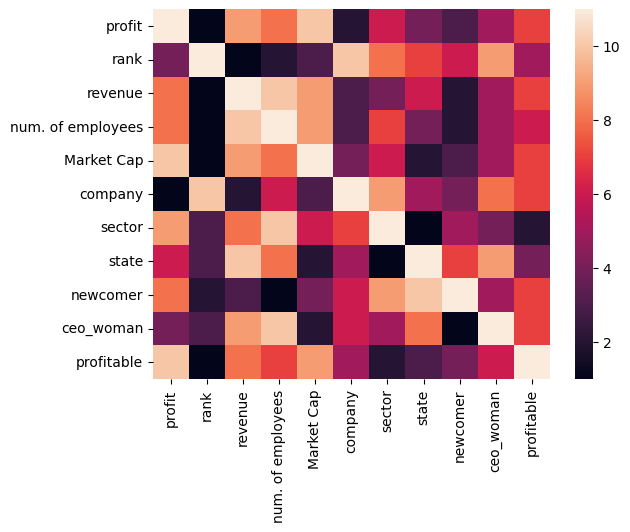

In [19]:
# first before visualization we must understand what is the relation between every column
# here the role of exploratory data analysis appear
##################How is one variable related to the other######################
# we will use corr function to get the correlation relations between all features
df_heatmap=pd.concat([df_target,df_scaled_and_normalized],axis=1)
cor=df_heatmap.corr()
# now we will plot it using seaborn library and heatmap tool
sns.heatmap(cor.rank('columns'))

In [20]:
# as we see here there are a huge relation between profit and revenue which can be (uptrend) as they have
# a huge relation between them
# it is the same thing between profit and if the company are profitable or number of employees
# profit depend too on market_cap

######################### sort of relations between variables #######################
# profit is slightly depend on if it was newcomer or not and the state it was there
# profit completely dont depent on company_name and rank of it so they are (constant trend)
#we can now make a reltion plots between ceo_woman to see number of ceo_women that exist in our dataset
# we will do relation to see the relation between number of companies ber state to detect what is the
# state that has more companies

#############What kind of trend is the data following?####################
#1)uptrend if Data values increase over time
#2)Downward Trend if Data values decrease over time.
#3)Constant or Horizontal Trend if Data values remain relatively stable over time, with no significant upward or downward movement.
#4)Seasonal Trend if Data exhibits regular and predictable changes that recur over specific periods, such as daily, monthly, or yearly.
#5)Cyclical Trend if Data follows long-term cycles or waves that are not fixed and often influenced by economic or business cycles.
#6)Random or Irregular Trend if Data shows no discernible pattern or trend, often characterized by random fluctuations.
#7)Exponential Trend if  Data values grow or decrease at an increasing rate, either exponentially increasing or decreasing.
#8)Logarithmic Trend if Data increases rapidly at first and then levels off over time.
#9)Polynomial Trend if Data follows a polynomial pattern, which can be linear, quadratic, cubic or ets.

#we can idetify it be:
#1) Visual Inspection: Plotting the data on a graph can help in visually identifying trends.
#2) Statistical Methods: Techniques such as moving averages, regression analysis, and decomposition methods can quantify and analyze trends.
#3) Time Series Decomposition: Breaking down a time series into trend, seasonal, and residual components can help in identifying and understanding trends.

################### can we divide our dataset int sub datasets#########################
# so here w can say that we can divide our dataset int subsets as it has alot of columns that 
#slightly depend or not depend on or profit that we will predict

## visualization

In [21]:
state_count= df[['sector','company','state']]
state_count = state_count.groupby(["state"], as_index = False)["company"].count()
state_count.rename(columns = {'company':'company_count'}, inplace=True)
state_count.sort_values(by='company_count',ascending=False,inplace=True)
state_count.head(10)

,state,company_count
3,CA,131
40,TX,97
31,NY,87
13,IL,62
32,OH,54
35,PA,45
8,FL,38
42,VA,34
9,GA,34
18,MA,33


Text(3, 100, '\n    The data shows that California, Texas, \n    and New York are the stateswith the most\n    Fortune 1000 companies. These three states\n    are amongst the most populated states of US\n    ')

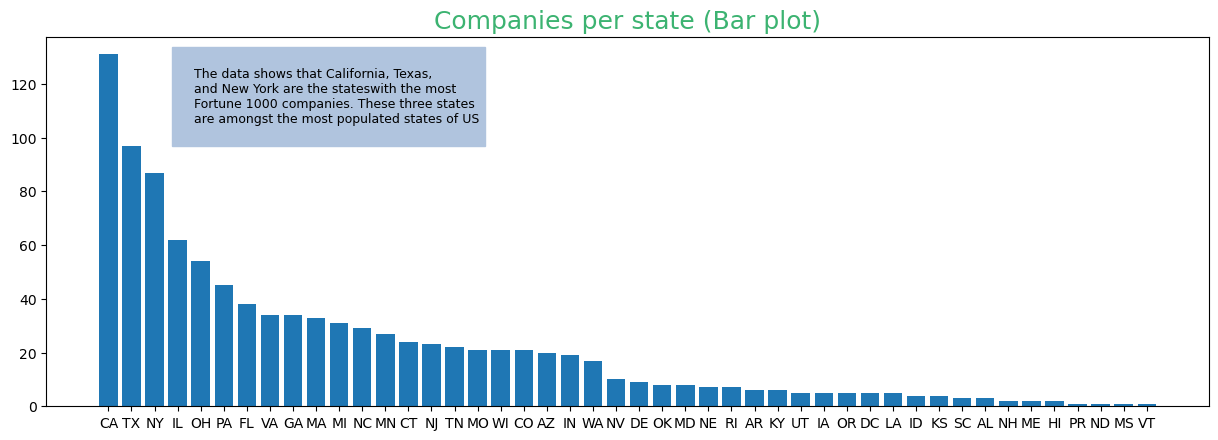

In [22]:
x = state_count['state']
y = state_count['company_count']
plt.figure().set_figwidth(15)
plt.bar(x=x, height=y)
plt.title('Companies per state (Bar plot)', fontsize=18, 
          color = 'MediumSeaGreen')

plt.annotate(text=(
    '''
    The data shows that California, Texas, 
    and New York are the stateswith the most
    Fortune 1000 companies. These three states
    are amongst the most populated states of US
    '''), xy=(3,100), fontsize=9,backgroundcolor='LightSteelblue')

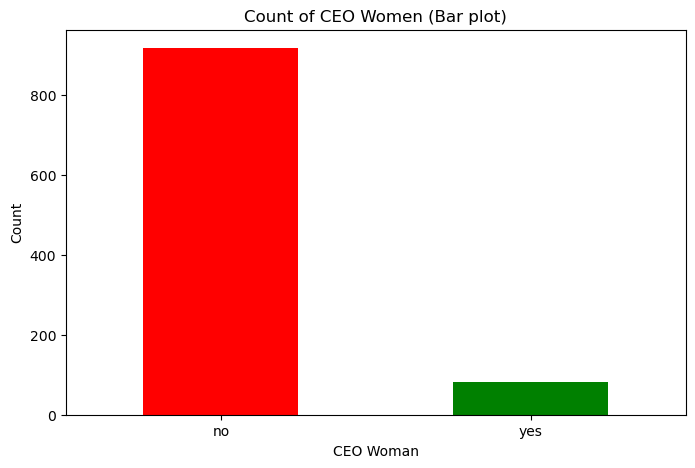

In [23]:
count_data = df['ceo_woman'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
count_data.plot(kind='bar', color=['red', 'green'])
plt.xlabel('CEO Woman')
plt.ylabel('Count')
plt.title('Count of CEO Women (Bar plot)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

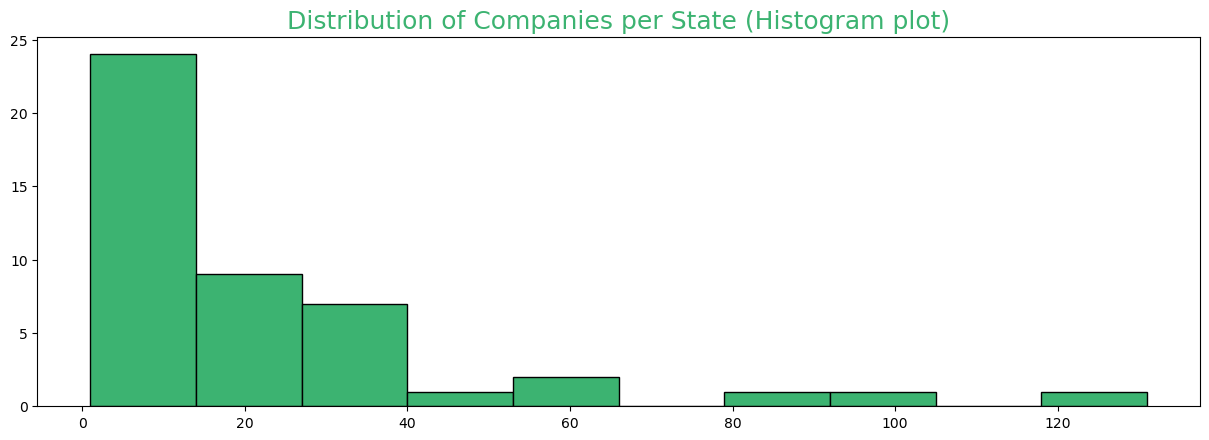

In [24]:
x = state_count['company_count']
plt.figure().set_figwidth(15)
plt.hist(x,bins=10,color='MediumSeaGreen',edgecolor='black')
plt.title('Distribution of Companies per State (Histogram plot)',fontsize=18,color='MediumSeaGreen')
plt.show()

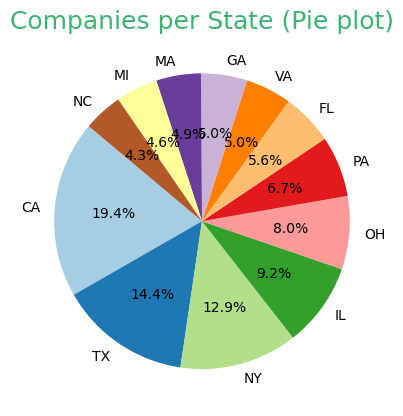

In [25]:
labels = state_count['state']
labels=labels.head(12)
sizes = state_count['company_count']
sizes=sizes.head(12)
plt.figure().set_figwidth(15)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Companies per State (Pie plot)', fontsize=18, color='MediumSeaGreen')
plt.show()

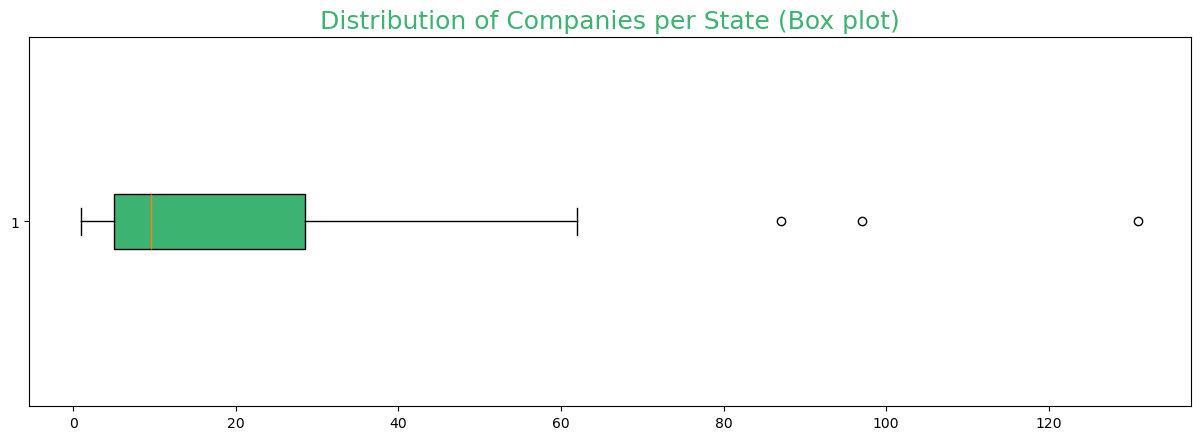

In [26]:
y =  state_count['company_count']
plt.figure().set_figwidth(15)
plt.boxplot(y, vert=False, patch_artist=True, boxprops=dict(facecolor='MediumSeaGreen'))
plt.title('Distribution of Companies per State (Box plot)', fontsize=18, color='MediumSeaGreen')
plt.show()

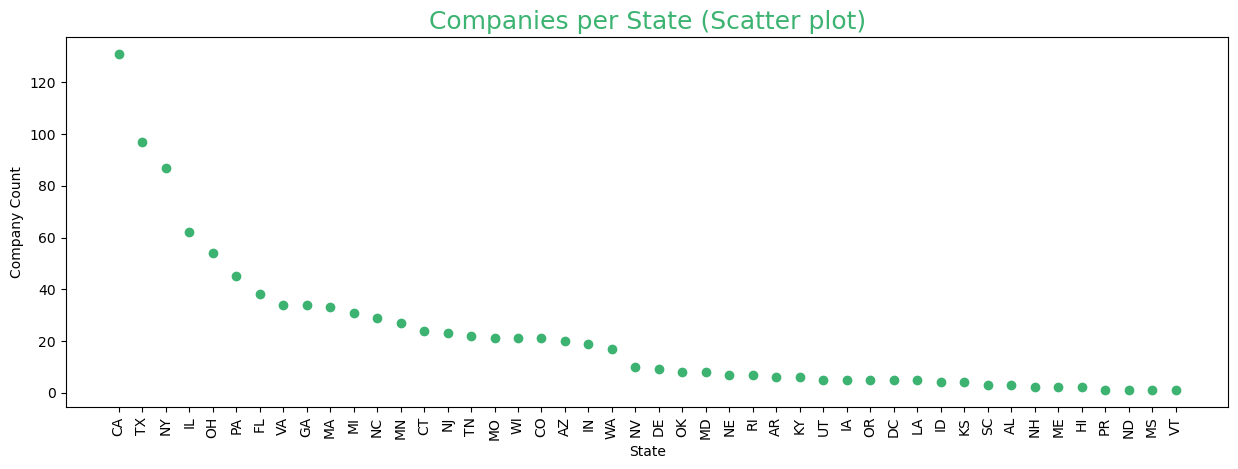

In [27]:
x = state_count['state']
y = state_count['company_count']
plt.figure().set_figwidth(15)
plt.scatter(x, y, color='MediumSeaGreen')
plt.title('Companies per State (Scatter plot)', fontsize=18, color='MediumSeaGreen')
plt.xlabel('State')
plt.ylabel('Company Count')
plt.xticks(rotation=90)
plt.show()

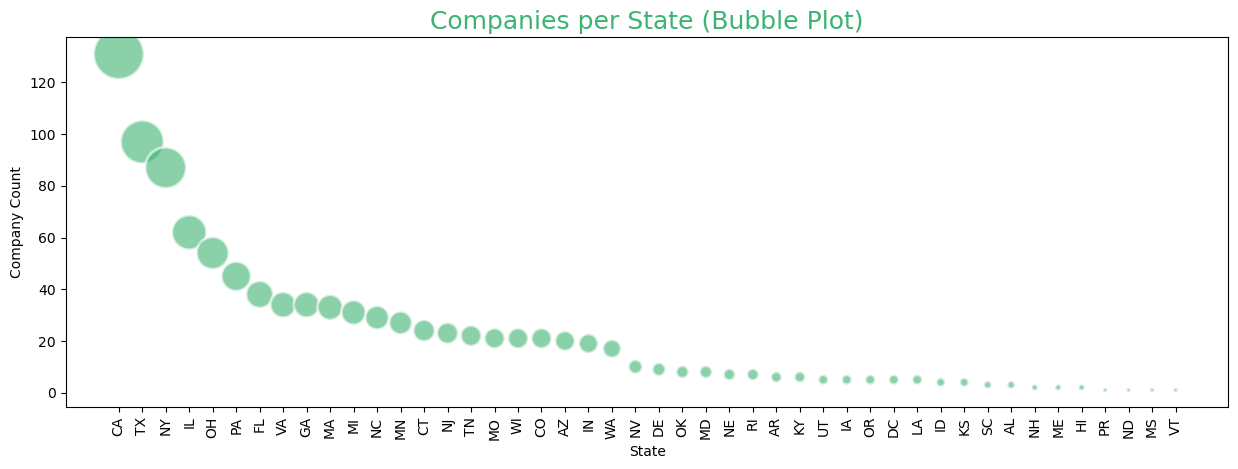

In [28]:
x = state_count['state']
y = state_count['company_count']
sizes = state_count['company_count'] * 10
plt.figure().set_figwidth(15)
plt.scatter(x, y, s=sizes, color='MediumSeaGreen', alpha=0.6, edgecolors="w", linewidth=2)
plt.title('Companies per State (Bubble Plot)', fontsize=18, color='MediumSeaGreen')
plt.xlabel('State')
plt.ylabel('Company Count')
plt.xticks(rotation=90)
plt.show()

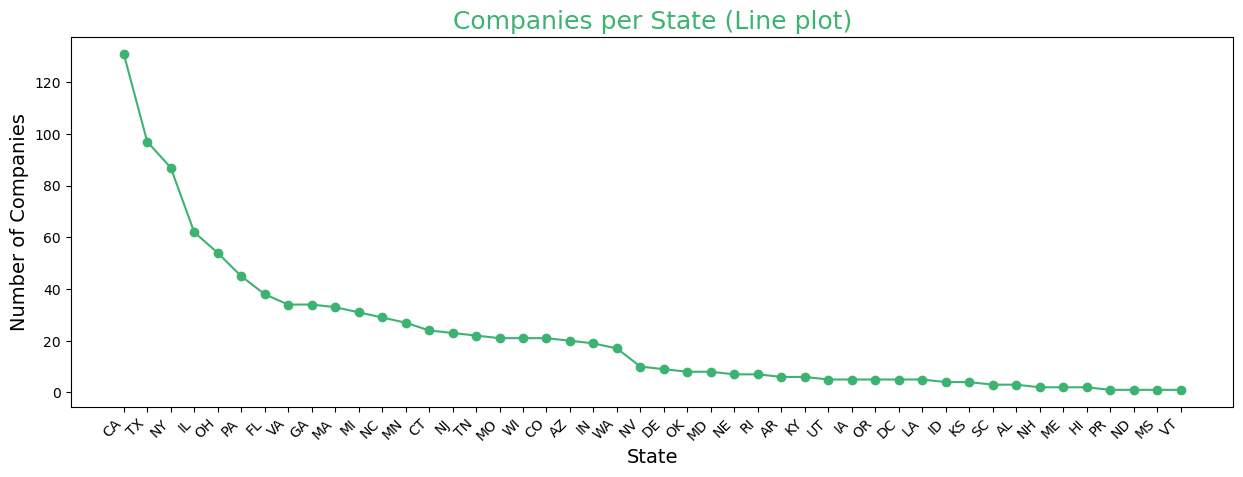

In [29]:
labels = state_count['state']
sizes = state_count['company_count']
plt.figure().set_figwidth(15)
plt.plot(labels, sizes, marker='o', linestyle='-', color='MediumSeaGreen')
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.title('Companies per State (Line plot)', fontsize=18, color='MediumSeaGreen')
plt.xticks(rotation=45, ha='right')

plt.show()

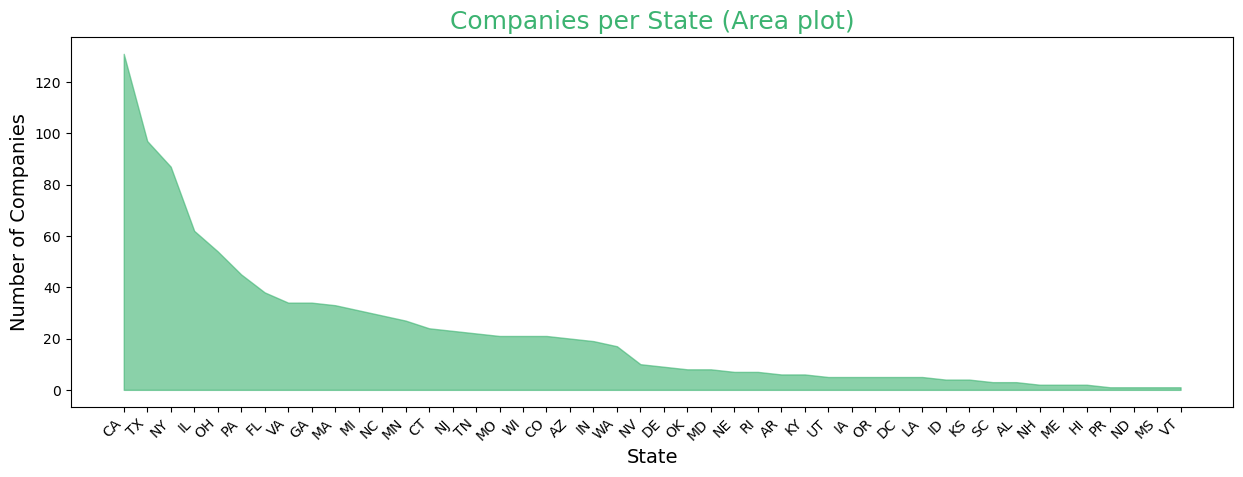

In [30]:
labels = state_count['state']
sizes = state_count['company_count']
plt.figure().set_figwidth(15)
x = np.arange(len(labels))
plt.fill_between(x, sizes, color='MediumSeaGreen', alpha=0.6)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Companies', fontsize=14)
plt.title('Companies per State (Area plot)', fontsize=18, color='MediumSeaGreen')
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.show()

## feature engineering

In [31]:
# here we will use one of wrapper methods algorithm to do our feature selection
# we will use Recursive Feature Elimination (RFE) algorithm
# we will use Linear Regression model to help RFE decide what is best features we can get
target = df_target
data = df_scaled_and_normalized # iused dataframe scaled and normalized as it is the high on that
# gives me more features related to our predictive operation more accuracy
print('previous number of features: ',data.shape[1])
print('######################')
# Initialize the Linear Regression model
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5) # here i need 5 most important features
# Fit RFE
rfe = rfe.fit(data, target)
# Print the rankings of features
print("Feature ranking:")
for i in range(data.shape[1]):
    print(f"Feature {data.columns[i]}: {rfe.ranking_[i]}")
# Print the selected features
selected_features = data.columns[rfe.support_]
print(f"Selected features: {selected_features}")
# now lets transform our features to data to get higher features to apply Dimenstion Reduction
data_rfe = rfe.transform(data)
# Dimenstion Reduction
# we will use Principal Component Analysis (PCA) technique
# this will convert our 5 features to new specific number of features we want
# number we pass should be less than or equal to features already found
pca = PCA(n_components=3) # redimension our features to new 3 principal components from our features
data_rfe_pca = pca.fit_transform(data_rfe)


previous number of features:  10
######################
Feature ranking:
Feature rank: 1
Feature revenue: 1
Feature num. of employees: 3
Feature Market Cap: 1
Feature company: 2
Feature sector: 4
Feature state: 5
Feature newcomer: 1
Feature ceo_woman: 6
Feature profitable: 1
Selected features: Index(['rank', 'revenue', 'Market Cap', 'newcomer', 'profitable'], dtype='object')


## Machine learning model

In [32]:
# import sys as we need the less number in float latter
# this status dictionary is needed to check accurancy for our four data frames that we specifed 
# later to see who gives me more accuracy
status={'with raw data':df_raw,
     'with scaled data':df_scaled,
     'with normalized data':df_scaled_and_normalized,
     'with demensional reduction data':data_rfe_pca 
    }
# this empty lists that end with score will contain our r2_score
r2_test_score=[]
r2_train_score=[]
# and empty lists that end with module will contain our module that has the best score for every 
# data frame statue
r2_test_module=[]
r2_train_module=[]
for name, statue in status.items():
    print(f'########################## {name} ###########################')
    # take the minimum number of f;oats to compare
    min_float_train = sys.float_info.min
    min_float_test = sys.float_info.min
    max_train=min_float_train
    max_test=min_float_test
    data=statue
    # check here to ensure that data frame with PCA will not enter as we mentioned because
    # we cant transform more features than it found in it and of course RFE model will has
    #bigger or equal features so we agnore transform operation
    if name != 'with demensional reduction data':
        data_rfe = rfe.transform(data)
    else:
        data_rfe = data_rfe_pca
    # we now create the model that has all machine learning module that we will test
    models = {
        ' RandomForest ': RandomForestRegressor(),
        ' DecisionTree ': DecisionTreeRegressor(),
        ' Ridge ': Ridge(),
        ' Lasso: ': Lasso(),
        ' KNeighborsRegressor ': KNeighborsRegressor(),
        ' KNN ': KNeighborsRegressor(),
        ' LinearRegression ': LinearRegression(),
        ' SVR ': SVR()
    }
    # split our input and output into train and test
    X_train, X_test, Y_train, Y_test = train_test_split(data_rfe,target, test_size=0.2, random_state=21)
    results = {}
    print('************************ prediction of x test ***************************')
    for name, model in models.items(): # on test model
        model.fit(X_train, Y_train) #fit our model
        Y_pred = model.predict(X_test) # predict using X_test
        print(name,': ')
        print("   Mean absolute error test =", round(sm.mean_absolute_error(Y_test, Y_pred), 2))
        print("   Mean squared error test=", round(sm.mean_squared_error(Y_test, Y_pred), 2))
        print("   Median absolute error test=", round(sm.median_absolute_error(Y_test, Y_pred), 2))
        print("   Explain variance score test=", round(sm.explained_variance_score(Y_test, Y_pred), 2))
        r2_value=round(sm.r2_score(Y_test, Y_pred), 2)
        print("   R2 score train=", r2_value)
        #this if condition to get the hightest score and best module in the all status of data frame in testing session
        if r2_value>max_test:
            max_test=r2_value
            nmodel1=name
        print('    **********************************************************************')
    print('************************ prediction of x train ***************************')
    results = {}
    for name, model in models.items():
        model.fit(X_train, Y_train) #fit our model
        Y_pred = model.predict(X_train) #now predict with X_train
        print(name,': ')
        print("   Mean absolute error test =", round(sm.mean_absolute_error(Y_train, Y_pred), 2))
        print("   Mean squared error test=", round(sm.mean_squared_error(Y_train, Y_pred), 2))
        print("   Median absolute error test=", round(sm.median_absolute_error(Y_train, Y_pred), 2))
        print("   Explain variance score test=", round(sm.explained_variance_score(Y_train, Y_pred), 2))
        r2_value=round(sm.r2_score(Y_train, Y_pred), 2)
        print("   R2 score train=", r2_value)
        #this if condition to get the hightest score and best module in the all status of data frame in traning session
        if r2_value>max_train:
            max_train=r2_value
            nmodel2=name
        
        print('    **********************************************************************')
    # now append high r2_score  to his related list
    r2_test_score.append(max_test)
    r2_train_score.append(max_train)
    # now append best module name to his related list
    r2_test_module.append(nmodel1)
    r2_train_module.append(nmodel2)
   # print('##################################### end of statue #########################################')

########################## with raw data ###########################
************************ prediction of x test ***************************
 RandomForest  : 
   Mean absolute error test = 1198.12
   Mean squared error test= 14416155.34
   Median absolute error test= 323.86
   Explain variance score test= 0.78
   R2 score train= 0.78
    **********************************************************************
 DecisionTree  : 
   Mean absolute error test = 1523.14
   Mean squared error test= 33457916.27
   Median absolute error test= 393.8
   Explain variance score test= 0.49
   R2 score train= 0.49
    **********************************************************************
 Ridge  : 
   Mean absolute error test = 1585.35
   Mean squared error test= 24805794.27
   Median absolute error test= 563.97
   Explain variance score test= 0.62
   R2 score train= 0.62
    **********************************************************************
 Lasso:  : 
   Mean absolute error test = 1585.81
   Me

In [33]:
status = ['Raw', 'Scaled', 'Normalized', 'PCA']
print('at predicion of X_test')
for i,type in enumerate(status):
    print('the best modul to ',type,' data frame is ',r2_test_module[i], ' and has score: ',r2_test_score[i])
print('#########################################')
print('at predicion of X_train')
for i,type in enumerate(status):
    print('the best modul to ',type,' is ',r2_train_module[i], ' and has score: ',r2_train_score[i])

at predicion of X_test
the best modul to  Raw  data frame is   RandomForest   and has score:  0.78
the best modul to  Scaled  data frame is   KNeighborsRegressor   and has score:  0.84
the best modul to  Normalized  data frame is   KNeighborsRegressor   and has score:  0.83
the best modul to  PCA  data frame is   DecisionTree   and has score:  0.81
#########################################
at predicion of X_train
the best modul to  Raw  is   DecisionTree   and has score:  1.0
the best modul to  Scaled  is   DecisionTree   and has score:  1.0
the best modul to  Normalized  is   DecisionTree   and has score:  1.0
the best modul to  PCA  is   DecisionTree   and has score:  1.0


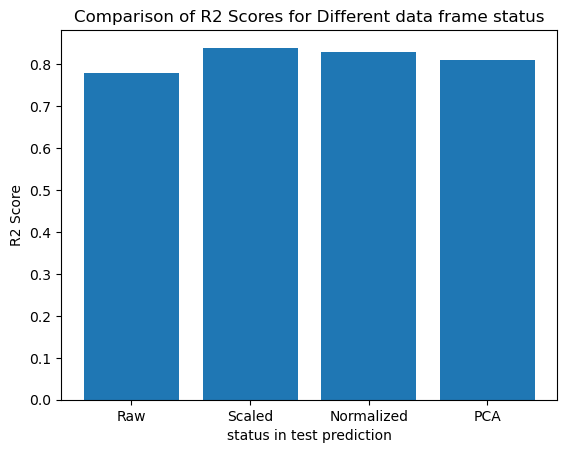

In [34]:
#visulation Result
# our status named in ascinding order
status = ['Raw', 'Scaled', 'Normalized', 'PCA']
# lets plot our r2_score in testing
plt.bar(status, r2_test_score)
plt.xlabel('status in test prediction')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different data frame status')
plt.show()

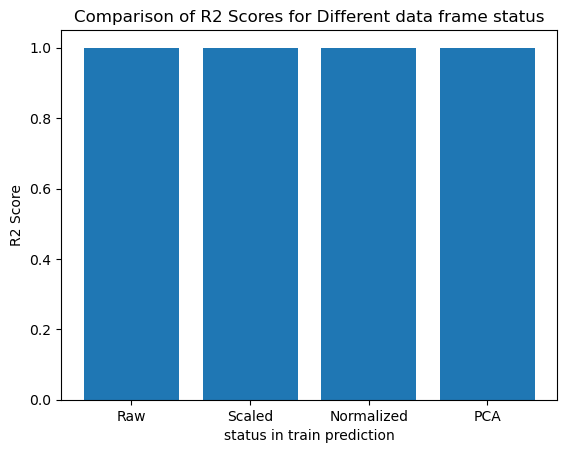

In [35]:
# now lets plot our r2_score in traing
plt.bar(status, r2_train_score)
plt.xlabel('status in train prediction')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores for Different data frame status')
plt.show()